In [ ]:
%%capture
!pip install soundfile pydub  librosa

In [1]:
from scipy.signal import kaiserord, lfilter, \
    firwin, freqz
import wave as we
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal
from scipy.io import wavfile
from scipy.fft import fft, fftshift, fftfreq,\
    rfft, rfftfreq, irfft,ifft


import scipy.io.wavfile as wav
from scipy import signal

import os

import soundfile as sf
from scipy.signal import filtfilt, iirnotch, freqz, \
    butter,convolve

import librosa

from pydub import AudioSegment
from pydub import AudioSegment
from pydub.playback import play
 

### 1 (v2)

In [2]:
task = 1
# SOURCE_FILE = "W4_08.wav"

OUTPUT_DIR = os.path.join(os.getcwd(),f"task_{task}")
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

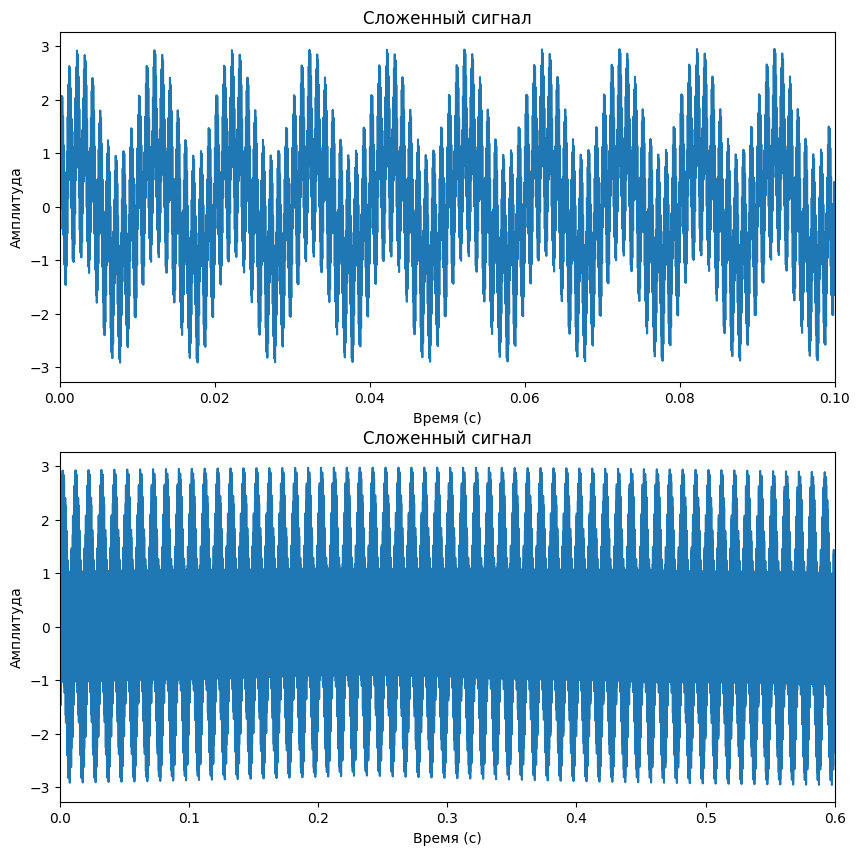

In [3]:
# Задаем параметры сигналов
f1 = 100  # частота первого колебания в Гц
f2 = 1000  # частота второго колебания в Гц
f3 = 10000  # частота третьего колебания в Гц
T = 1  # длительность сигнала в секундах
Fs = 50000*2  # частота дискретизации в Гц

# Создаем временную ось
t = np.linspace(0, T, Fs)

# Генерируем гармонические сигналы
x1 = np.sin(2 * np.pi * f1 * t)
x2 = np.sin(2 * np.pi * f2 * t)
x3 = np.sin(2 * np.pi * f3 * t)

# Складываем сигналы
x = x1  + x2 + x3

# Отображаем график сигнала
plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.xlim([0, 0.1])
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Сложенный сигнал')


plt.subplot(2, 1, 2)
plt.plot(t, x)
plt.xlim([0, 0.6])
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Сложенный сигнал')

plt.savefig(os.path.join(OUTPUT_DIR,f"ComplexSignalInput"))

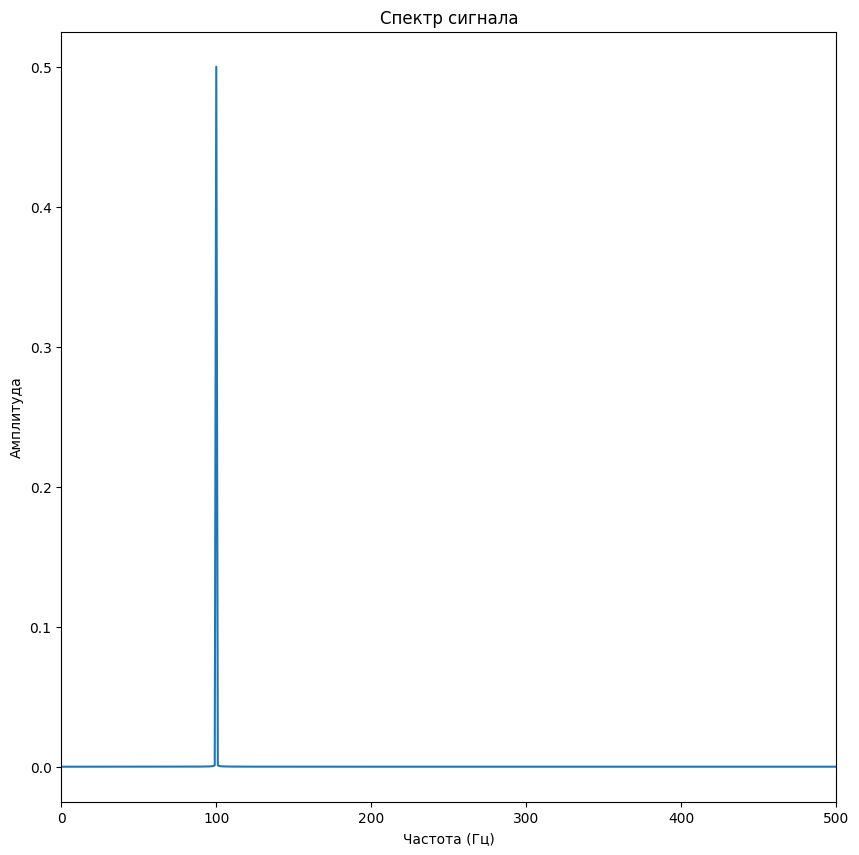

In [5]:
# Рассчитываем спектр
N = len(x)  # число отсчетов
X = np.abs(fft(x)) / N  # амплитудный спектр
f = np.linspace(0, N , N)  # частоты

# Отображаем график спектра
plt.figure(figsize=(10,10))
plt.plot(f, X)
# plt.xlim([0, 1000])
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
# plt.xticks(np.arange(f.min(),f.max(),int((f.max()-f.min())/10) + 1))
plt.title('Спектр сигнала')
plt.xlim([0,500])

plt.savefig(os.path.join(OUTPUT_DIR,f"SpectrumInput"))

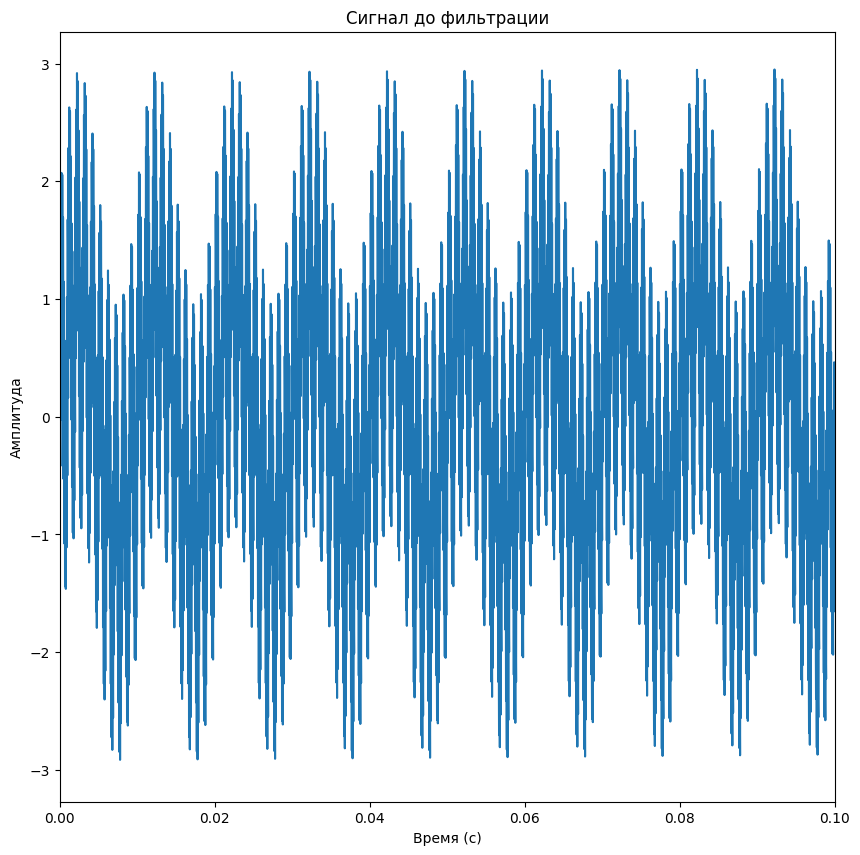

In [6]:
# Задаем параметры фильтра
fc = 100  # частота среза фильтра в Гц
order = 2  # порядок фильтра

# Создаем фильтр
b, a = butter(order, fc / (Fs / 2), 'low')

# Фильтруем сигнал
filtered_signal = convolve(x, b / a, mode='same')

# Отображаем график сигнала до и после фильтрации
plt.figure(figsize=(10,10))
# plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.xlim([0, 0.1])
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Сигнал до фильтрации')

 


plt.savefig(os.path.join(OUTPUT_DIR,f"BeforeFiltered"))

C:\Users\Dmitry\AppData\Local\Temp\ipykernel_23388\2061083451.py:17: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20 * np.log10(abs(h)))


Text(0.5, 1.0, 'Исходный сигнал')

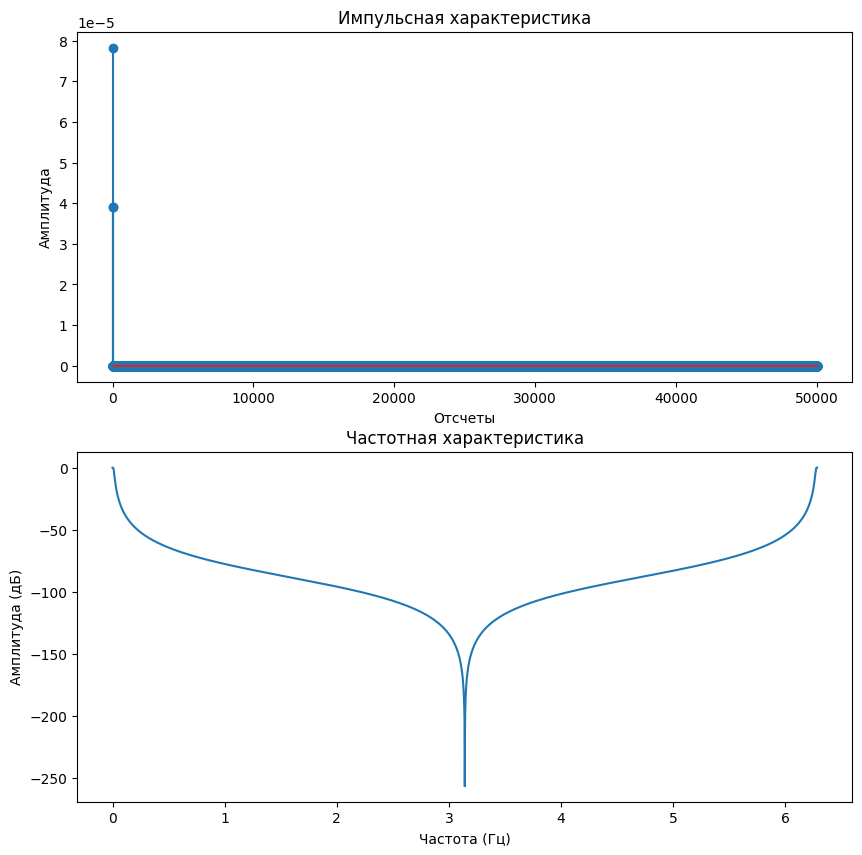

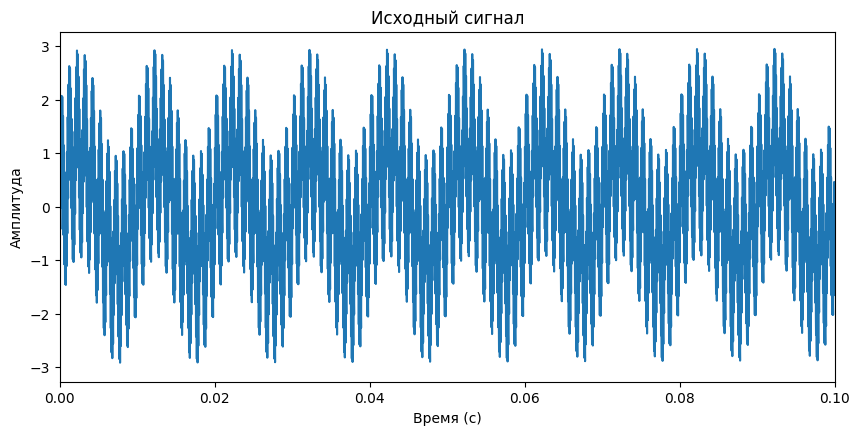

In [7]:
# Рассчитываем импульсную характеристику
impulse_response = np.zeros(len(t))
impulse_response[:len(b)] = b

# Рассчитываем частотную характеристику
w, h = freqz(b, a, len(t), Fs)

# Отображаем графики импульсной и частотной характеристик
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
plt.stem(impulse_response)
plt.xlabel('Отсчеты')
plt.ylabel('Амплитуда')
plt.title('Импульсная характеристика')

plt.subplot(2, 1, 2)
plt.plot(w, 20 * np.log10(abs(h)))
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда (дБ)')
plt.title('Частотная характеристика')



plt.savefig(os.path.join(OUTPUT_DIR,f"Графики_импульсной_и_частотной_характеристик"))

# Свертка сигнала с импульсной характеристикой
signal = x
# Выполняем фильтрацию сигнала
filtered_signal = convolve(signal, impulse_response, mode='same')

# Отображаем графики исходного и отфильтрованного сигналов
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.xlim([0, 0.1])
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.xlim
plt.title('Исходный сигнал')

 

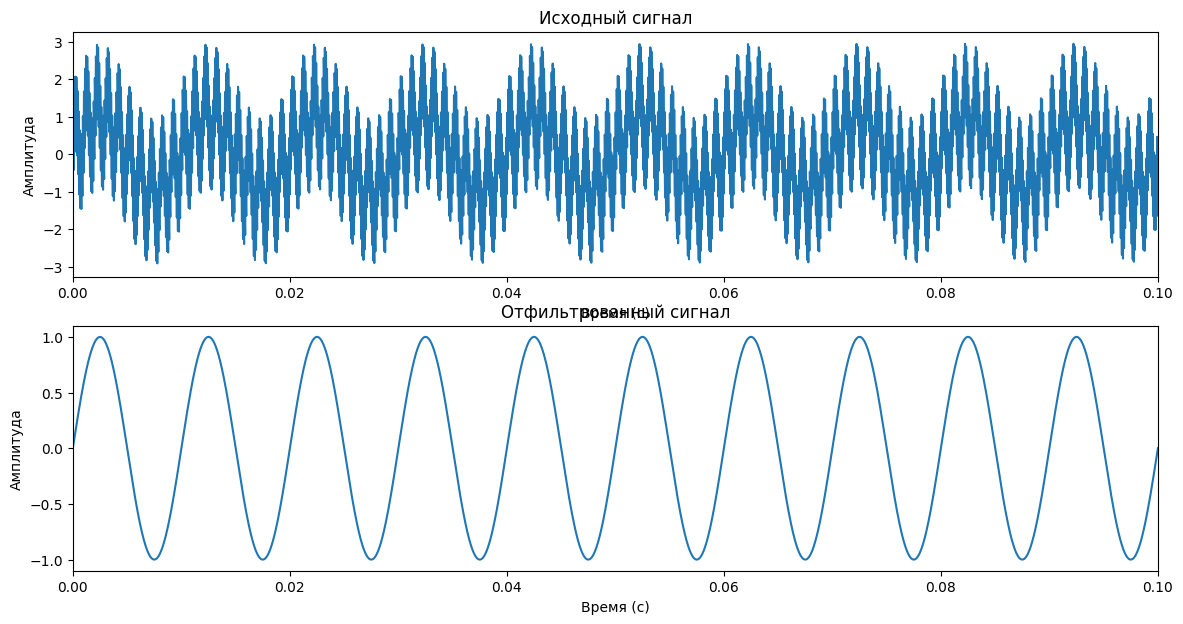

In [8]:
# Фильтрация через ДПФ
# Выполнить ДПФ для исходного сигнала
X = np.fft.fft(x)

# Получить спектральную плотность мощности
Pxx = np.abs(X) ** 2

# Фильтр
filt = np.zeros(len(X), dtype=bool)
cutoff_freq = 250  # задаем пороговую частоту
filt[:cutoff_freq] = True
filt[-cutoff_freq:] = True

# Обратное ДПФ для отфильтрованного спектра
Y = X * filt
y = np.real(np.fft.ifft(Y))

plt.figure(figsize=(14,7))
plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.xlim([0, 0.1])
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Исходный сигнал')

plt.subplot(2, 1, 2)
plt.plot(t, y)
plt.xlim([0, 0.1])
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Отфильтрованный сигнал')



plt.savefig(os.path.join(OUTPUT_DIR,f"Фильтрация_ДПФ"))

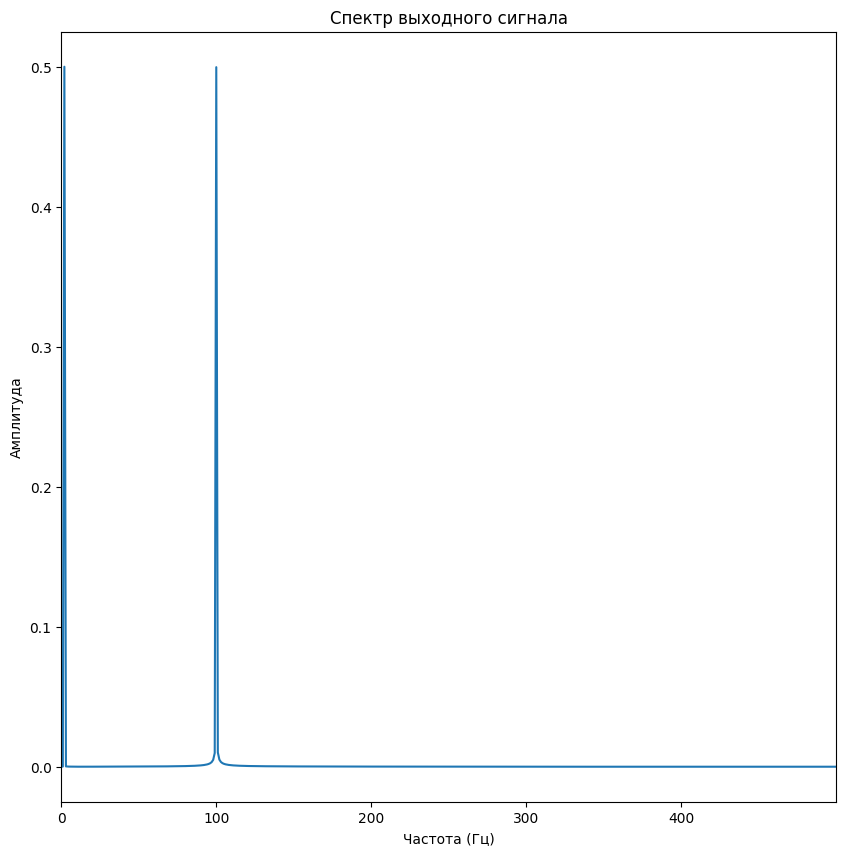

<Figure size 640x480 with 0 Axes>

In [69]:
# Рассчитываем спектр выходного сигнала
N = len(y)  # число отсчетов
X = np.abs(np.fft.fft(y)) / N  # амплитудный спектр
f = np.arange(0, N) * Fs / N  # частоты

# Отображаем график спектра
plt.figure(figsize=(10,10))
plt.plot(f, X)
plt.xlim([0, 500])
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.xticks(np.arange(f.min(),500,100))
plt.title('Спектр выходного сигнала')

plt.show()


plt.savefig(os.path.join(OUTPUT_DIR,f"Результат_Фильтрация_ДПФ"))

### 1

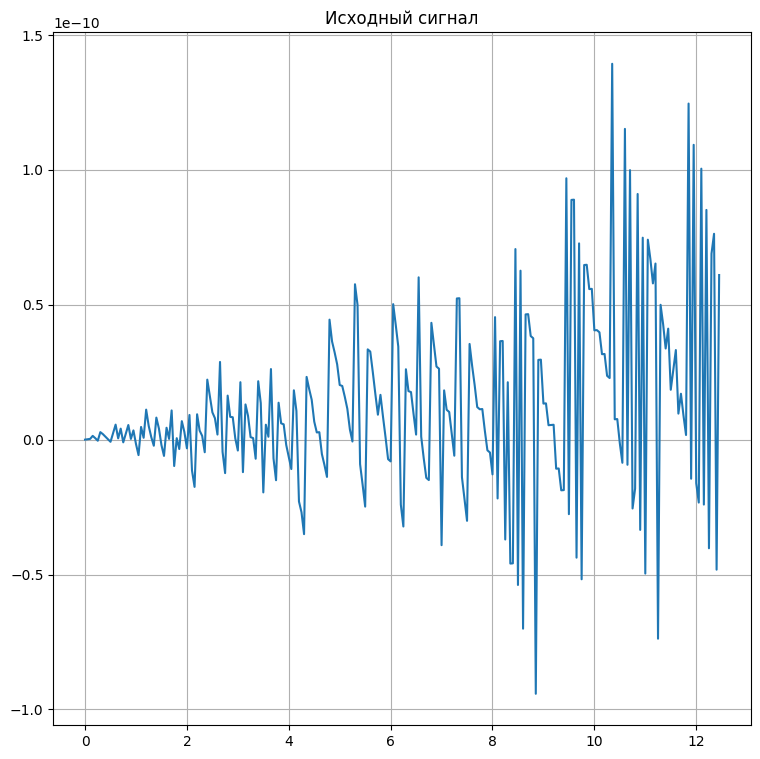

In [240]:
step = 0.05  # шаг дискретизации
ns = 250  # число отсчетов сигнала
TimeS = np.arange(0, step*ns, step)
AF1 = 100
AF2 = 1000
AF3 = 10000
SIG = np.sin(2*np.pi*AF1*TimeS) + np.sin(2*np.pi*AF2*TimeS) + np.sin(2*np.pi*AF3*TimeS)

plt.figure(figsize=(9,9))
plt.plot(TimeS, SIG)
plt.grid(True)
plt.title('Исходный сигнал')
plt.show()

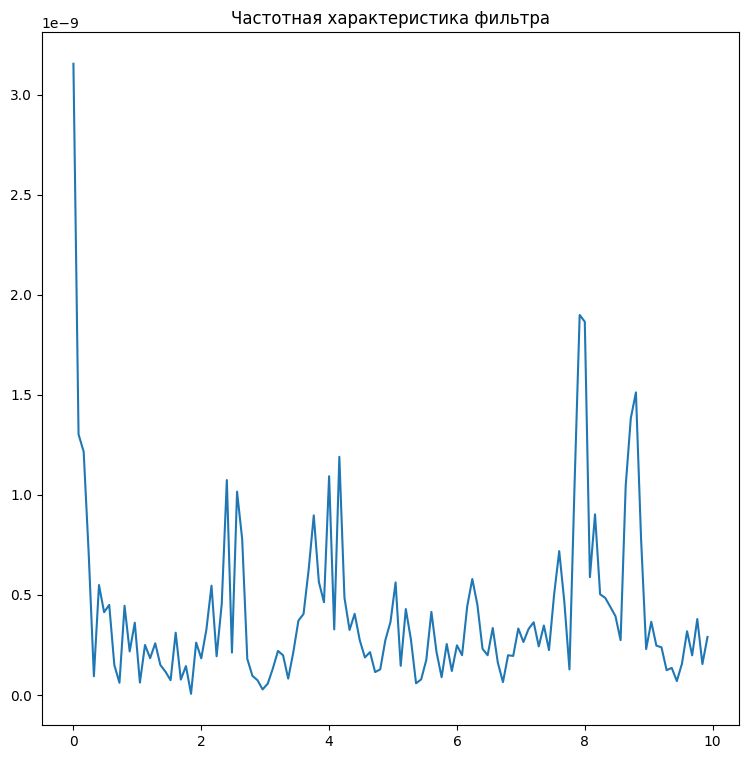

In [244]:
# Спектр  
d_f = 1/step
step_fs = d_f/ns
Fn = np.arange(0, d_f, step_fs)
L = len(SIG)
FS = fft(SIG, L)

# freq, original_spectrum = signal.periodogram(SIG, fs=ns)
# # Построение спектра исходного сигнала
# plt.figure(figsize=(12, 6))
# plt.plot(freq[1:], (10 * np.log10(original_spectrum))[1:], linewidth=0.55)
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Power Spectral Density (dB/Hz)')
# plt.title('Original Signal Spectrum')
# # plt.xticks(np.arange(0, 24000, step=1500))
# # plt.yticks(np.arange(np.min( (10 * np.log10(original_spectrum))[1:]), np.max( (10 * np.log10(original_spectrum))[1:])+10, step=10))
# plt.grid(True)
# plt.show()

plt.figure(figsize=(9,9))
plt.plot(Fn[:round(ns/2)], np.abs(FS[:round(ns/2)]))
plt.title('Частотная характеристика фильтра')
plt.show()

C:\Users\Dmitry\AppData\Local\Temp\ipykernel_21852\4231584277.py:9: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(w, 20 * np.log10(abs(h)))


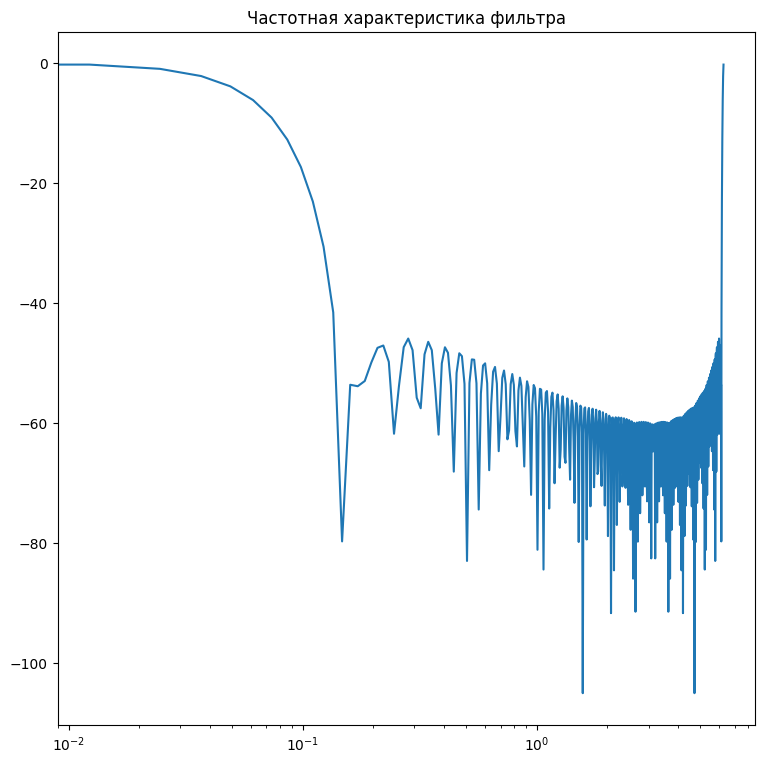

In [242]:
N = 100  # длина фильтра
cent_f = 100  # центральная частота
d_f = 20000  # частота дискретизации
imp = firwin(N, cent_f/(d_f/2), window='hamming')

plt.figure(figsize=(9, 9))
w, h = freqz(imp, whole=True)
plt.title('Частотная характеристика фильтра')
plt.semilogx(w, 20 * np.log10(abs(h)))

# plt.xlim(0, d_f)
# plt.ylim(-1, 1)
plt.show()

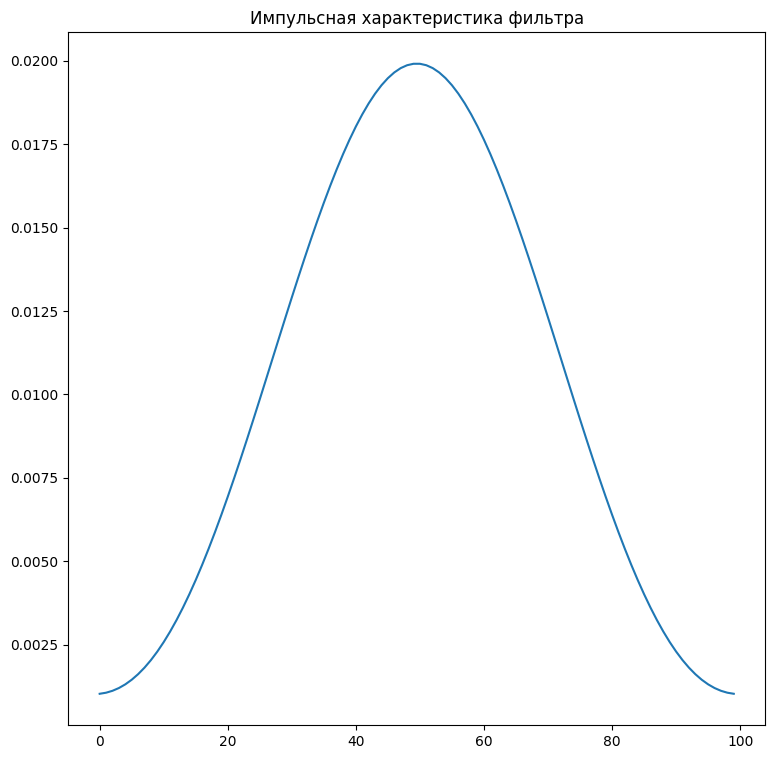

In [243]:
plt.figure(figsize=(9,9))
plt.plot(imp)
plt.title('Импульсная характеристика фильтра')
plt.show()

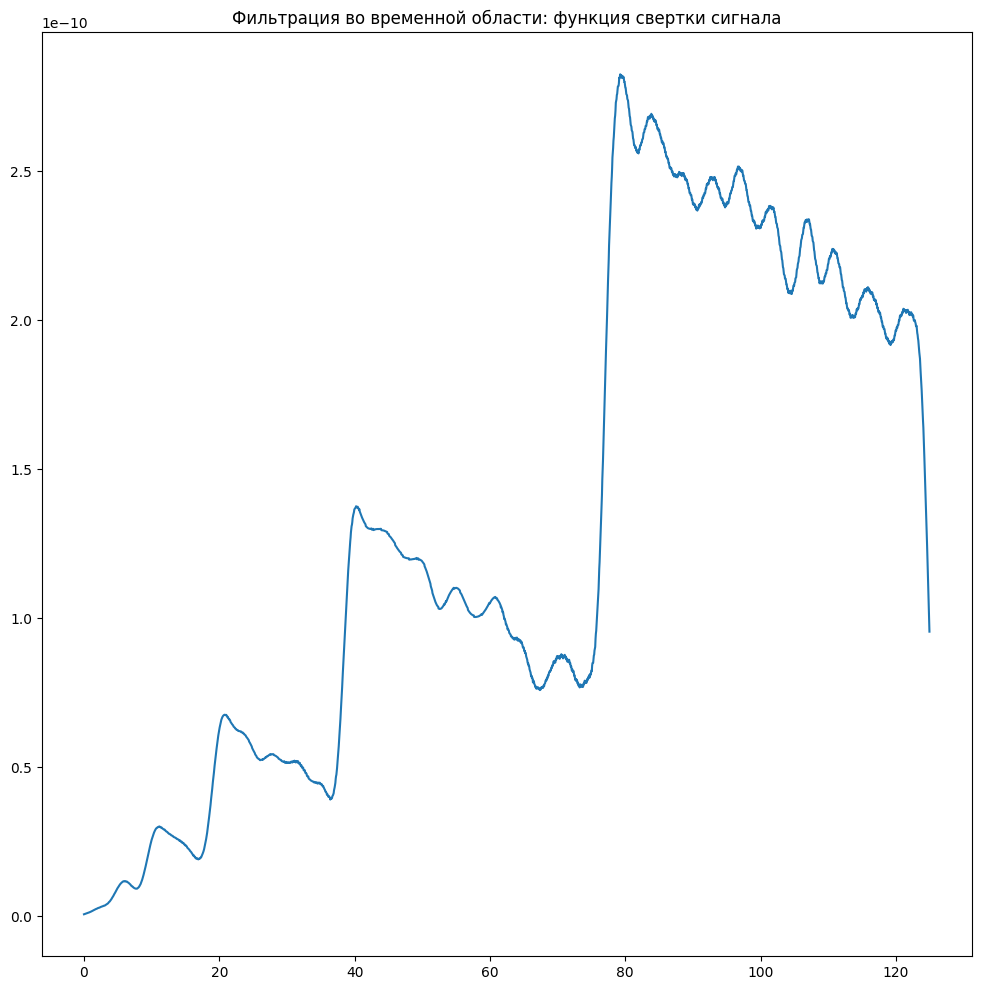

In [62]:
# Фильтрация
filtered_signal = np.convolve(SIG, imp, mode='same')
plt.figure(figsize=(12,12))
plt.plot(TimeS, filtered_signal)
plt.title('Фильтрация во временной области: функция свертки сигнала')
plt.show()

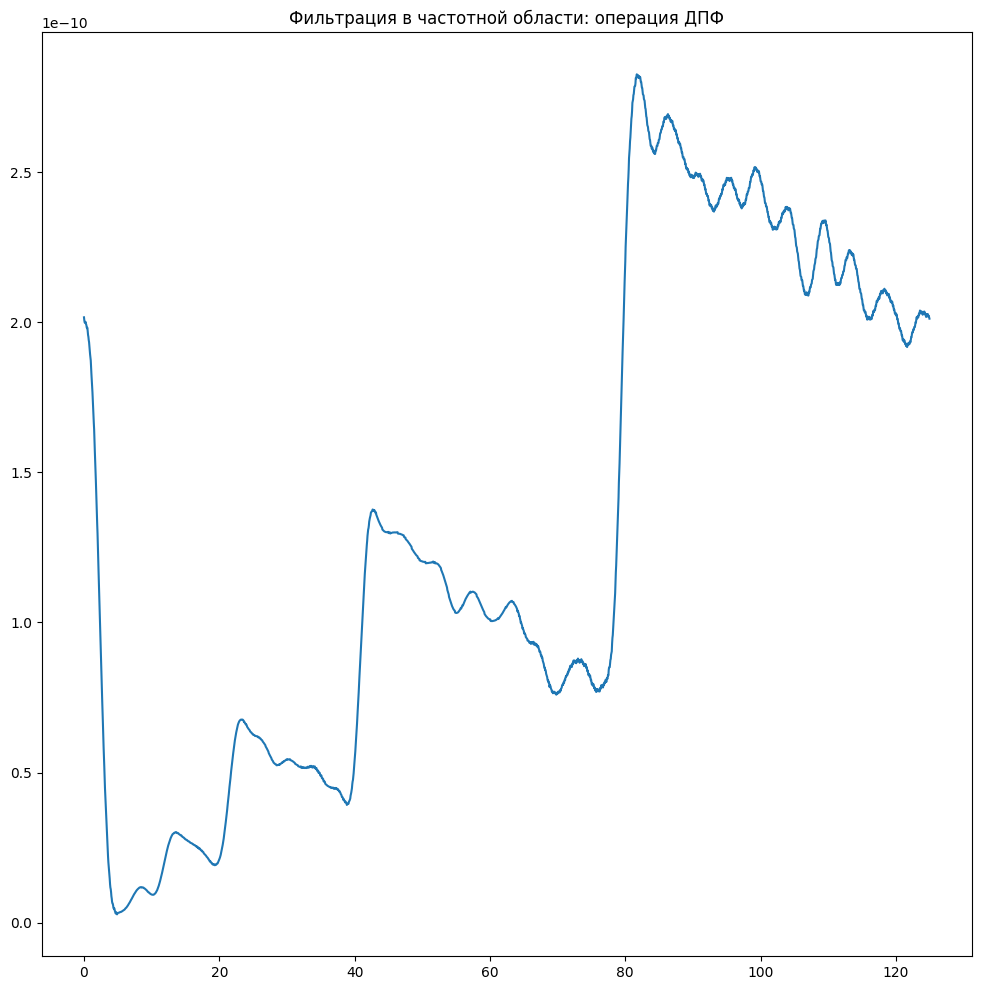

In [63]:
D_imp = np.fft.fft(imp, L)
filtered_signal_fft = FS * D_imp
filtered_signal_ifft = ifft(filtered_signal_fft)

plt.figure(figsize=(12,12))
plt.plot(TimeS, np.real(filtered_signal_ifft))
plt.title('Фильтрация в частотной области: операция ДПФ')
plt.show()

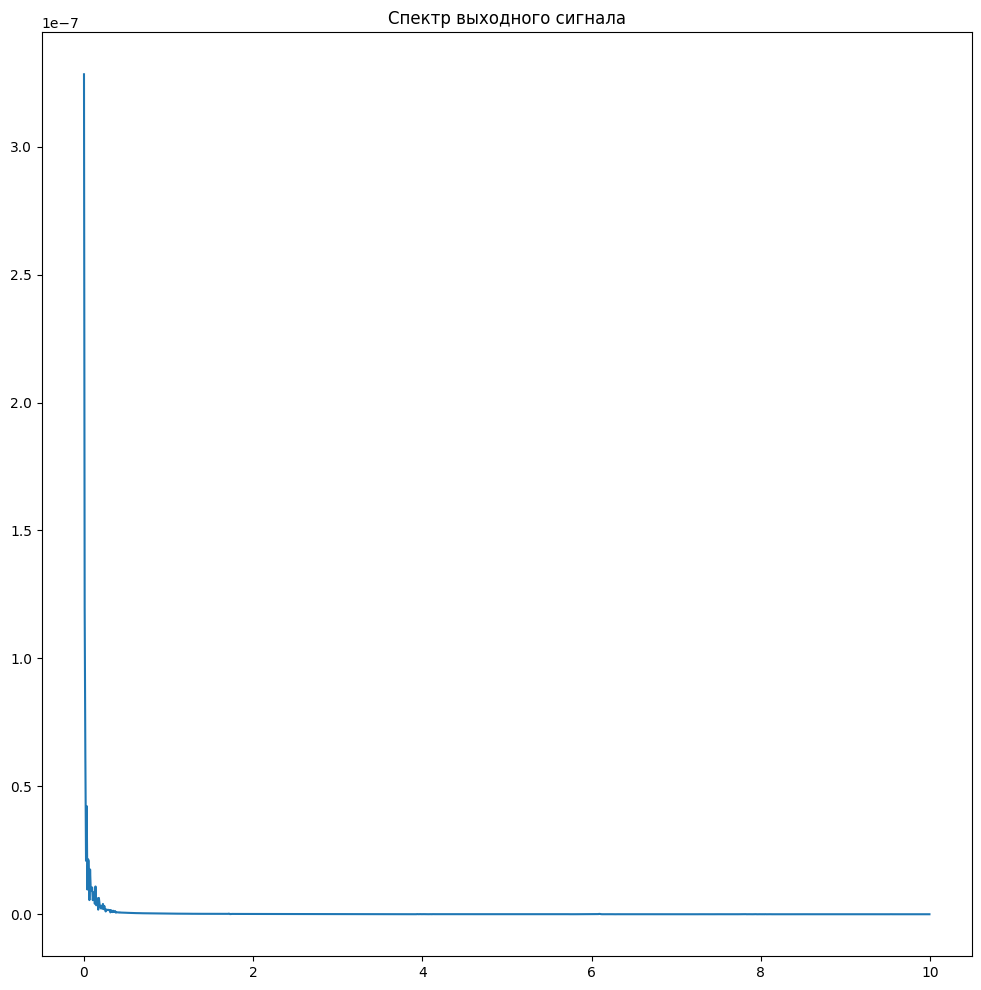

In [64]:
res = fft(filtered_signal, L)
plt.figure(figsize=(12,12))
plt.plot(Fn[:round(ns/2)], np.abs(res[:round(ns/2)]))
plt.title('Спектр выходного сигнала')
plt.show()

### 2

In [2]:
task = 2
SOURCE_FILE = "W4_08.wav"

OUTPUT_DIR = os.path.join(os.getcwd(),f"task_{task}")
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

In [4]:
fs, Audiodata = wavfile.read(SOURCE_FILE) # Возвращает частоту дискретизации (в сэмплах/сек) и данные из файла LPCM WAV.
print(fs)
# Plot the audio signal in time
# print(type(Audiodata))
# plt.figure(figsize=(16,8))
# plt.plot(Audiodata)
# plt.xlim(0,10000)
# plt.title('Audio signal in time',size=15)
# plt.savefig(os.path.join(OUTPUT_DIR,f"Audio_signal_in_time"))

44100


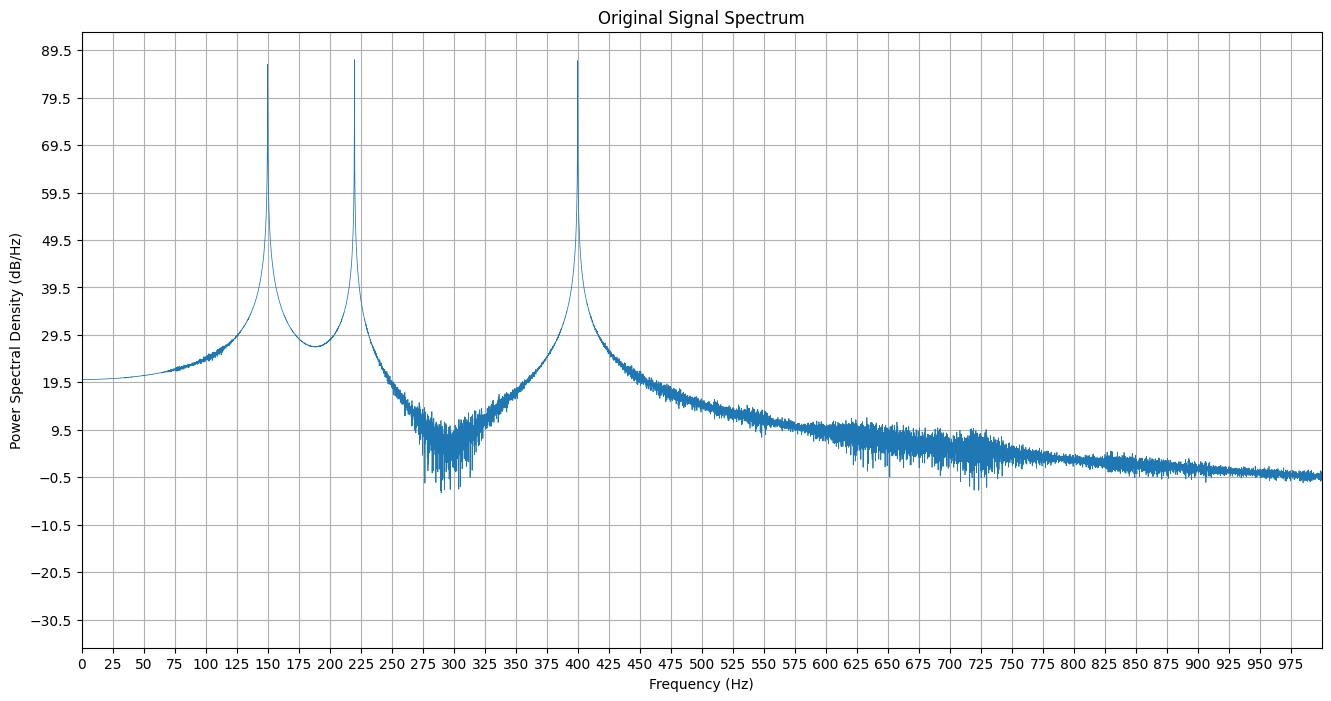

In [5]:
freq, original_spectrum = signal.periodogram(Audiodata, fs=fs)
# Построение спектра исходного сигнала
plt.figure(figsize=(16, 8))
plt.plot(freq[1:], (10 * np.log10(original_spectrum))[1:], linewidth=0.55)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.title('Original Signal Spectrum')
plt.xticks(np.arange(0, 1000, step=25))
plt.yticks(np.arange(np.min( (10 * np.log10(original_spectrum))[1:]), np.max( (10 * np.log10(original_spectrum))[1:])+10, step=10))
plt.grid(True)
plt.xlim([0,1000])
plt.show()


# plt.savefig(os.path.join(OUTPUT_DIR,f"Original_Signal_Spectrum"))

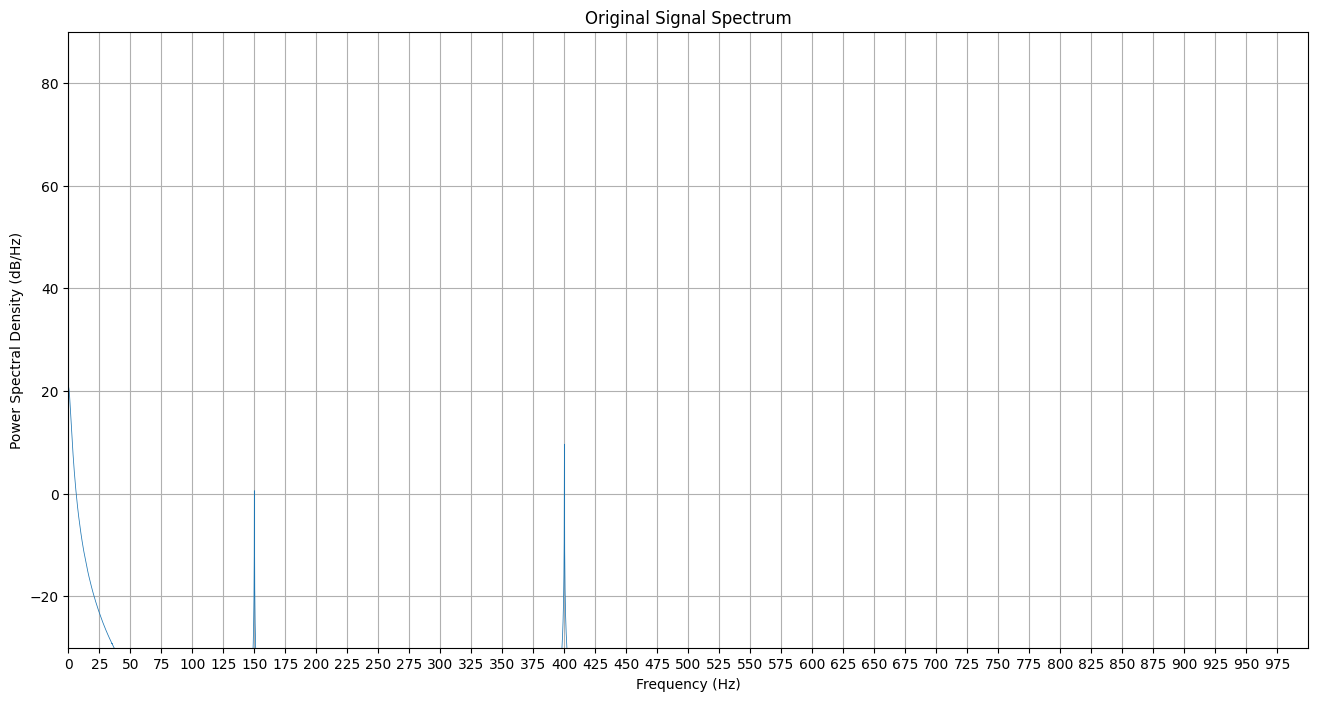

In [45]:
# Создание полосового фильтра (bandstop filter)
audio_output =Audiodata
for _ in range(2):
    # normalized_center_freq_1 = 400 / (fs / 2)
    # normalized_bandwidth_1 = 6 / (fs / 2)
    
    
    normalized_center_freq_2 = 150 / (fs / 2)
    normalized_bandwidth_2 = 5 / (fs / 2)
    
    
    
    normalized_center_freq_3 = 220 / (fs / 2)
    normalized_bandwidth_3 = 6 / (fs / 2)
    
    b, a = signal.iirnotch(normalized_center_freq_3, normalized_bandwidth_3)
    d, c = signal.iirnotch(normalized_center_freq_2, normalized_bandwidth_2)
    # f, e = signal.iirnotch(normalized_center_freq_3, normalized_bandwidth_3)        
    # Применение фильтра к сигналу
    # for j in range(T_list[I]):
    audio_output = signal.lfilter(b, a, audio_output)
    audio_output = signal.lfilter(d, c, audio_output)
    # audio_output = signal.lfilter(f, e, audio_output)
    
freq, original_spectrum = signal.periodogram(audio_output, fs=fs)
# Построение спектра исходного сигнала
plt.figure(figsize=(16, 8))
plt.plot(freq[1:], (10 * np.log10(original_spectrum))[1:], linewidth=0.55)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.title('Original Signal Spectrum')
plt.xticks(np.arange(0, 1000, step=25))
plt.ylim([-30,90])
plt.grid(True)
plt.xlim([0,1000])
plt.show()

filename = os.path.join(OUTPUT_DIR,f"Output.wav")
# pathes.append(filename)
sample_rate = fs

# Сохранение отфильтрованного сигнала в файл
sf.write(
    filename,
    audio_output*10/np.max(abs(audio_output*10)), 
    sample_rate, 'PCM_32')


Автоматическое нахождение частот и ширин помех методом спектрального анализа можно выполнить с помощью алгоритма поиска пиков в спектре сигнала. Вот пример кода для такого автоматического нахождения:

In [10]:
from scipy.signal import find_peaks 

def find_noise_frequency_spectrum(signal, fs):
    # Вычисление спектра сигнала
    spectrum = np.abs(fft(signal))

    # Определение частотной оси
    freq_axis = fftfreq(len(signal), 1 / fs)

    # Нахождение пиков в спектре
    peaks, _ = find_peaks(spectrum, height=0)

    # Определение частоты и ширины помехи
    peak_freqs = freq_axis[peaks]
    noise_frequency = peak_freqs[np.argmax(spectrum[peaks])]
    noise_bandwidth = np.sum(spectrum[peaks] > 0.5 * np.max(spectrum[peaks]))

    return noise_frequency, noise_bandwidth

def spectral_noise_suppression(signal, noise_threshold):
    # Вычисление спектра сигнала
    signal_spectrum = np.fft.fft(signal)
    
    # Определение амплитуды шумового спектра
    noise_spectrum = np.abs(signal_spectrum)
    
    # Применение порогового значения для подавления шума
    suppressed_spectrum = np.where(noise_spectrum < noise_threshold, 0, signal_spectrum)
    
    # Обратное преобразование Фурье для получения фильтрованного сигнала
    filtered_signal = np.fft.ifft(suppressed_spectrum)
    
    return filtered_signal.real

In [38]:
# Создание и применение многополосных фильтров
filtered_audio = Audiodata.copy() # Создание копии исходного сигнала  
list_of_audios_iter = [filtered_audio]# / np.max(np.abs(filtered_audio))]
list_of_titles = ["Input"]

T_list = [1,1]#,1]
I = 0

Шаг итерации:3
	Частота помехи:149.9695
	Ширина помехи:2


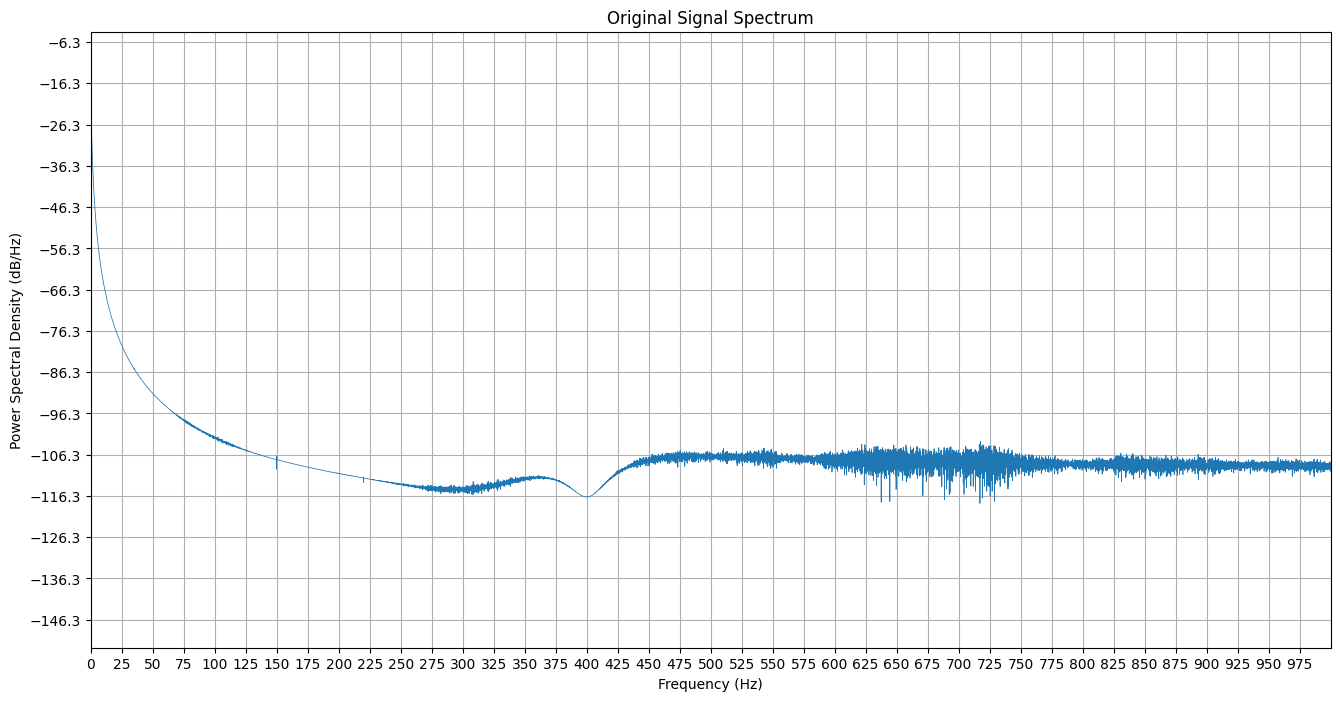

In [41]:
audio_i = list_of_audios_iter[-1]/np.max(np.abs(list_of_audios_iter[-1]))
noise_frequency, noise_bandwidth = find_noise_frequency_spectrum(audio_i, fs)
print(f"Шаг итерации:{I+1}"+\
    f"\n\tЧастота помехи:{round(noise_frequency,4)}"+
    f"\n\tШирина помехи:{noise_bandwidth}"
    ) 
question = int(input("Filter?"))
if question == 1:
    T = 0
    while True:
        # Нормализация частоты и ширины помехи
        normalized_center_freq = noise_frequency / (fs / 2)
        normalized_bandwidth = noise_bandwidth / (fs / 2)

        # Создание полосового фильтра (bandstop filter)
        b, a = signal.iirnotch(normalized_center_freq, normalized_bandwidth)  
        # Применение фильтра к сигналу
        # for j in range(T_list[I]):
        audio_i = signal.lfilter(b, a, audio_i) 
        T = T+1
        if int(input("again?")) != 1:
            list_of_audios_iter.append(audio_i)# / np.max(np.abs(audio_i)))
            list_of_titles.append(f"Filter_iteration_{I+1}_times_iter{T}")#_{T_list[I]}")
            I += 1
            break
    
freq, original_spectrum = signal.periodogram(list_of_audios_iter[-1]/np.max(np.abs(list_of_audios_iter[-1])), fs=fs)
# Построение спектра исходного сигнала
plt.figure(figsize=(16, 8))
plt.plot(freq[1:], (10 * np.log10(original_spectrum))[1:], linewidth=0.55)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.title('Original Signal Spectrum')
plt.xticks(np.arange(0, 1000, step=25))
plt.yticks(np.arange(np.min( (10 * np.log10(original_spectrum))[1:]), np.max( (10 * np.log10(original_spectrum))[1:])+10, step=10))
plt.grid(True)
plt.xlim([0,1000])
plt.show()


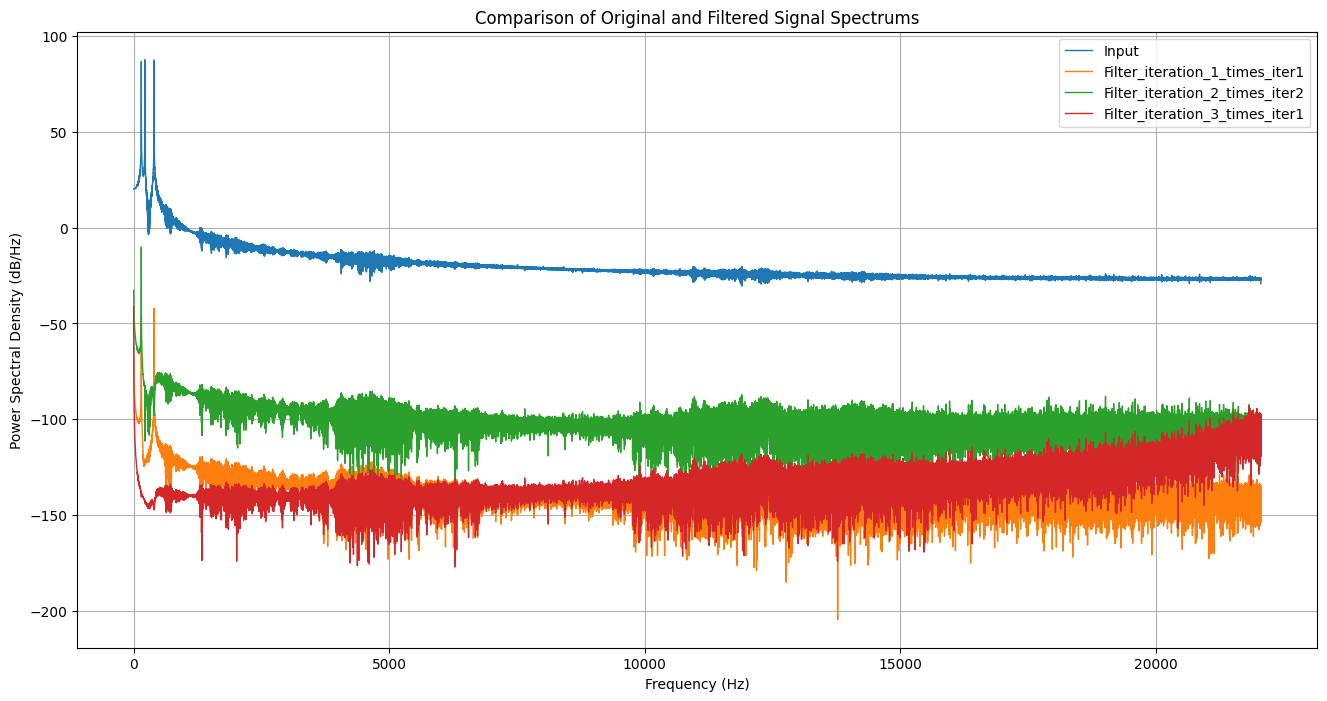

<Figure size 640x480 with 0 Axes>

In [43]:
plt.figure(figsize=(16, 8))
for i in range(len(list_of_audios_iter)): 
    
    audio,title = list_of_audios_iter[i],list_of_titles[i]
    freq_i, spectrum_i = signal.periodogram(list_of_audios_iter[i], fs=fs)
    plt.plot(freq_i[1:], (10 * np.log10(spectrum_i))[1:], label=title,linewidth=1)
    
# plt.plot(filtered_freq, 10 * np.log10(filtered_spectrum), label='Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.title('Comparison of Original and Filtered Signal Spectrums')
plt.legend()
plt.grid(True)
plt.show()

plt.savefig(os.path.join(OUTPUT_DIR,f"Comparison_of_Original_and_Filtered_Signal_Spectrums"))


Increase value

In [49]:
import sounddevice as sd

for i in range(len(list_of_audios_iter)): 
    # sd.play(amplified_audio, fs)
    list_of_audios_iter[i] *= 50

# plt.figure(figsize=(12, 6))
# for i in range(len(list_of_audios_iter)): 
    
#     audio,title = list_of_audios_iter[i],list_of_titles[i]
#     freq_i, spectrum_i = signal.periodogram(list_of_audios_iter[i], fs=fs)
#     plt.plot(freq_i[1:], (10 * np.log10(spectrum_i))[1:], label=title,linewidth=1)
    
# # plt.plot(filtered_freq, 10 * np.log10(filtered_spectrum), label='Filtered Signal')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Power Spectral Density (dB/Hz)')
# plt.title('Comparison of Original and Filtered Signal Spectrums')
# plt.legend()
# plt.grid(True)
# plt.show()

Save

In [50]:
pathes = []
for i in range(len(list_of_audios_iter)): 
    audio,title = list_of_audios_iter[i],list_of_titles[i]

    # Задайте путь к файлу и параметры дискретизации
    filename = os.path.join(OUTPUT_DIR,f"{title}.wav")
    pathes.append(filename)
    sample_rate = fs

    # Сохранение отфильтрованного сигнала в файл
    sf.write(
        filename,
        audio/np.max(np.abs(audio)), 
        sample_rate, 'PCM_32')
    

### 2 (Var 3)

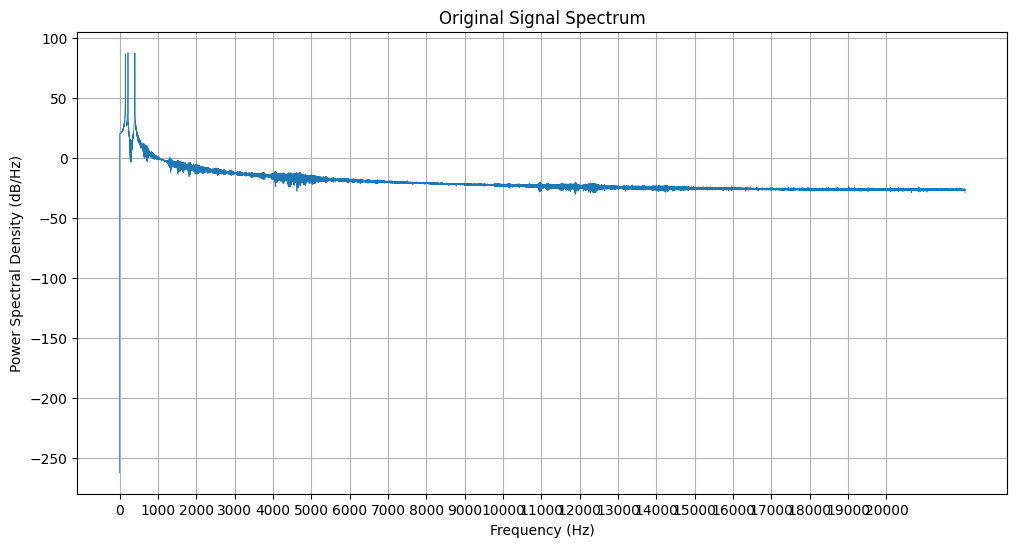

In [158]:
# Загрузка аудиофайла
sample_rate, audio_data = wavfile.read(SOURCE_FILE)

# Получение спектра исходного сигнала
freq, original_spectrum = signal.periodogram(audio_data, fs=sample_rate)

# Построение спектра исходного сигнала
plt.figure(figsize=(12, 6))
plt.plot(freq, 10 * np.log10(original_spectrum), linewidth=0.55)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.title('Original Signal Spectrum')
plt.xticks(np.arange(0, 21000, step=1000))
# plt.yticks(np.arange(-40, 120, step=5))
plt.grid(True)
plt.show()

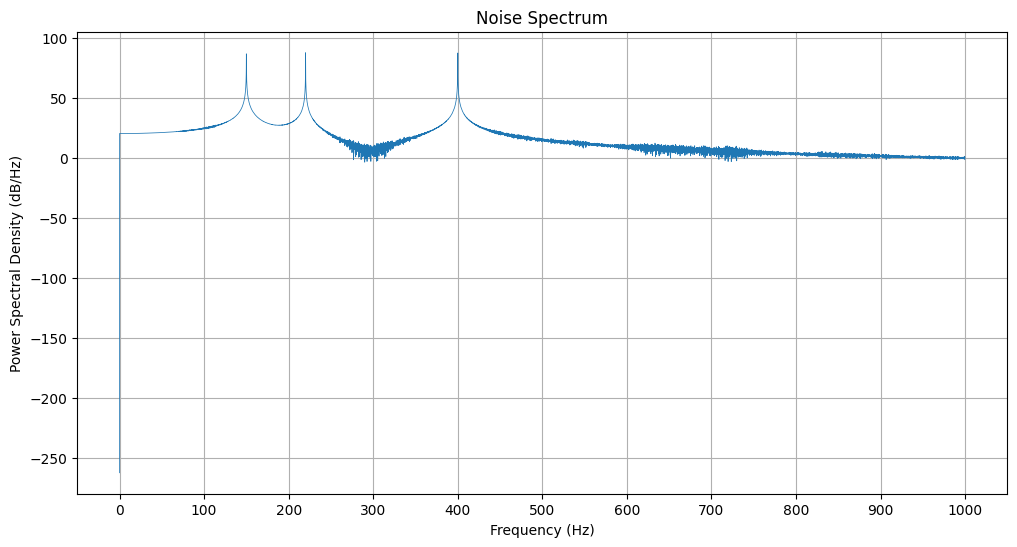

In [159]:
# Определение частотного состава помехи
noise_start_freq = 0  # Начальная частота помехи
noise_end_freq = 500  # Конечная частота помехи
noise_spectrum = original_spectrum[(freq >= noise_start_freq) & (freq <= noise_end_freq)]
noise_freq = freq[(freq >= noise_start_freq) & (freq <= noise_end_freq)]

# Построение спектра помехи
plt.figure(figsize=(12, 6))
plt.plot(noise_freq, 10 * np.log10(noise_spectrum), linewidth=0.55)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.title('Noise Spectrum')
plt.xticks(np.arange(0, 1100, step=100))
plt.grid(True)
plt.show()

In [161]:
filtered_audio = audio_data

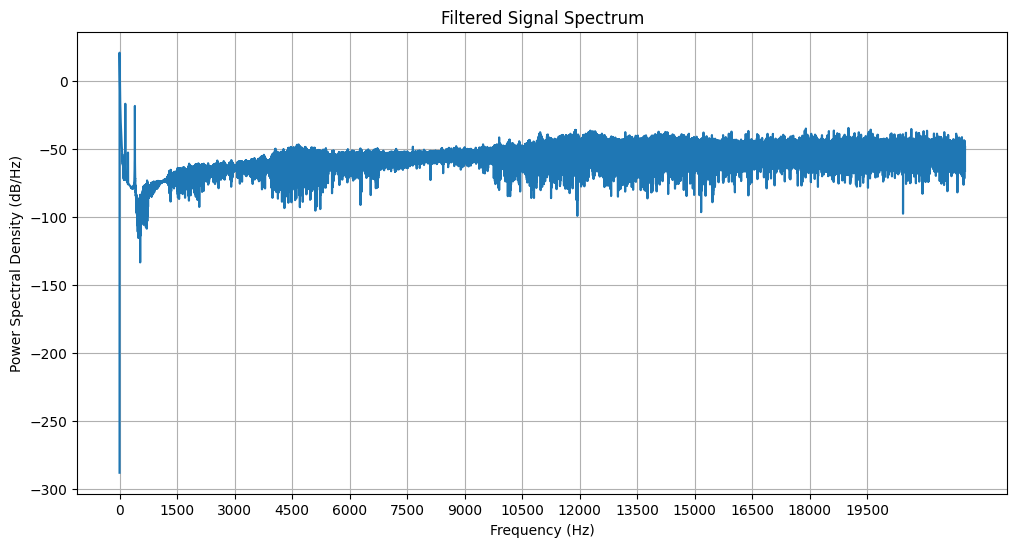

In [164]:
# Создание режекторного фильтра для подавления помехи
normalized_center_freq = (noise_start_freq + noise_end_freq) / (2 * sample_rate)
normalized_bandwidth = (noise_end_freq - noise_start_freq) / sample_rate


# Создание режекторного фильтра (notch filter)
b, a = signal.iirnotch(normalized_center_freq, normalized_bandwidth)

# Применение фильтра к аудиосигналу
filtered_audio = signal.lfilter(b, a, filtered_audio)

# Получение спектра отфильтрованного сигнала
filtered_freq, filtered_spectrum = signal.periodogram(filtered_audio, fs=sample_rate)

# Построение спектра отфильтрованного сигнала
plt.figure(figsize=(12, 6))
plt.plot(filtered_freq, 10 * np.log10(filtered_spectrum), linewidth=1.55)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.title('Filtered Signal Spectrum')
plt.xticks(np.arange(0, 21000, step=1500))
plt.grid(True)
plt.show()

In [165]:
filtered_audio = filtered_audio / np.max(np.abs(filtered_audio))

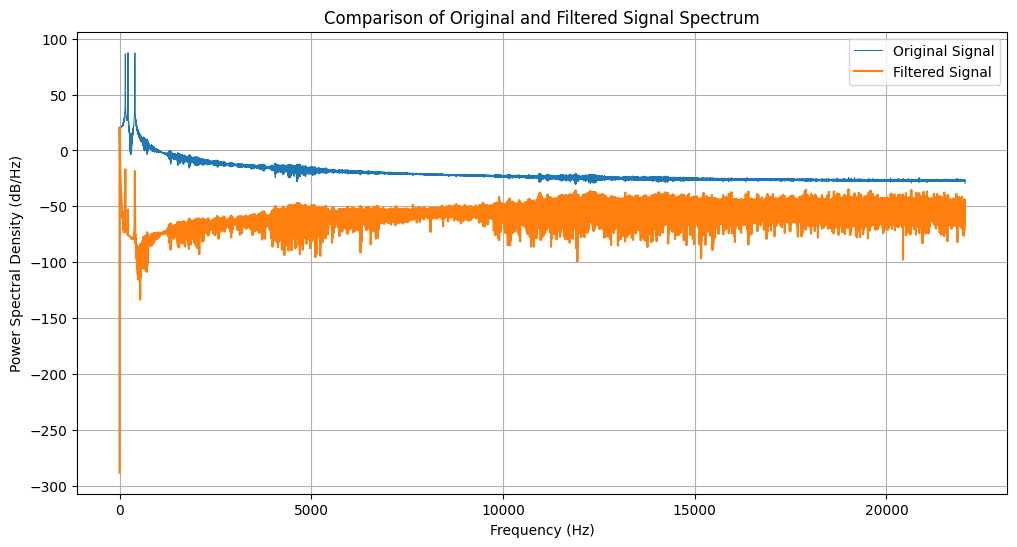

In [166]:
 # Воспроизведение отфильтрованного аудио

sf.write('filtered_audio.wav', filtered_audio, sample_rate, 'PCM_24')
# Анализ результатов фильтрации
# Сравнение спектра исходного и отфильтрованного сигнала
plt.figure(figsize=(12, 6))
plt.plot(freq, 10 * np.log10(original_spectrum), label='Original Signal',linewidth=0.75)
plt.plot(filtered_freq, 10 * np.log10(filtered_spectrum), label='Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.title('Comparison of Original and Filtered Signal Spectrum')
plt.legend()
plt.grid(True)
plt.show()

### 2 (old)
 Дан аудиофайл с записью голоса, на который наложена помеха.
1. Постройте спектр сигнала и определите частотный состав помехи.
2. Постройте режекторный фильтр, подавляющий частоты помехи.
3. С помощью полученного фильтра подавите помехи в заданном сигнале и определите голосовую информацию, содержащуюся заданной аудиозаписи.
4. Постройте спектр отфильтрованного сигнала, сравните его со спектром исходного сигнала и проведите анализ результатов фильтрации.
  > Рекомендация. Для лучшей фильтрации очень сильной помехи, во много раз превосходящей по мощности полезный сигнал, целесообразно в качестве ЧХ фильтра использовать произведение одной и той же ЧХ РФ на себя (2, 3 или более раз).

In [ ]:
task = 2
SOURCE_FILE = "W4_08.wav"

OUTPUT_DIR = os.path.join(os.getcwd(),f"task_{task}")
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

In [ ]:
fs, Audiodata = wavfile.read(SOURCE_FILE) # Возвращает частоту дискретизации (в сэмплах/сек) и данные из файла LPCM WAV.
print(fs)
# Plot the audio signal in time
plt.plot(Audiodata)
plt.title('Audio signal in time',size=15)

In [ ]:
# Загрузка аудиофайла
sampling_rate, audio = wav.read(SOURCE_FILE)

# Установка параметров фильтра
cutoff_freq = 512  # Частота среза фильтра (в Гц)

# Применение фильтра нижних частот
filtered_audio = apply_lowpass_filter(audio, cutoff_freq, sampling_rate)

# Сохранение отфильтрованного аудио в новый файл
wav.write(f'filtered_{SOURCE_FILE}', sampling_rate, filtered_audio)

1. Загрузим аудиофайл и построим его спектр:

In [ ]:
y, sr = librosa.load(SOURCE_FILE)
print(sr)
D = np.abs(librosa.stft(y))
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='log', x_axis='time')
plt.title('Спектр сигнала')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

2. Определим частотный состав помехи путем визуального анализа спектра.
3. Построим режекторный фильтр на основе определенных частот помех:

In [ ]:
!pip3 install --upgrade librosa

In [ ]:
# определяем полосы подавления (в Гц)
band_stop_1 = [128, 256]
band_stop_2 = [280, 512]
band_stop_3 = [128, 256]
band_stop_4 = [280, 512]


nyquist_freq = sr / 2 # максимальная частота дискретизации/дискретности 
normalized_freqs_bandstop_1= np.array(band_stop_1) / nyquist_freq # нормализация границ полосы подавления к интервалу от -pi до pi.
normalized_freqs_bandstop_2= np.array(band_stop_2) / nyquist_freq

normalized_freqs_bandstop_3= np.array(band_stop_3) / nyquist_freq
normalized_freqs_bandstop_4= np.array(band_stop_4) / nyquist_freq

# создаем фильтр
b, a = signal.butter(4, [normalized_freqs_bandstop_1[0], normalized_freqs_bandstop_1[1]], btype='bandstop')
d, c = signal.butter(4, [normalized_freqs_bandstop_2[0], normalized_freqs_bandstop_2[1]], btype='bandstop')
f, e = signal.butter(4, [normalized_freqs_bandstop_3[0], normalized_freqs_bandstop_3[1]], btype='bandstop')
h, i = signal.butter(4, [normalized_freqs_bandstop_4[0], normalized_freqs_bandstop_4[1]], btype='bandstop')


# применяем фильтр к сигналу
y_filtered = signal.filtfilt(b,a,y)
y_filtered = signal.filtfilt(d,c,y_filtered)
y_filtered = signal.filtfilt(f,e,y_filtered)
y_filtered = signal.filtfilt(h,i,y_filtered)
plt.figure(figsize=(10, 4))
D_filtred=np.abs(librosa.stft(y_filtered))
librosa.display.specshow(
    librosa.amplitude_to_db(D_filtred),
    y_axis='log', 
    x_axis='time'
)
plt.title('Спектр отфильтрованного сигнала')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

4. Сравним спектры исходного и отфильтрованного сигналов:

Сохраняем

In [ ]:
# Задайте путь к файлу и параметры дискретизации
filename = os.path.join(OUTPUT_DIR,f"FILTERED_OUT.wav")
sample_rate = sr

sf.write(filename, y_filtered, sample_rate, 'PCM_24')

Увеличим громкость

In [ ]:
song = AudioSegment.from_wav(filename)


# but let's make him *very* quiet
song = song + 100
output = os.path.join(OUTPUT_DIR,f"Increased_FILTERED_OUT.wav")
# save the output
song.export(output, "wav")

In [ ]:
y_increased, sr = librosa.load(output)
D_filtred=np.abs(librosa.stft(y_increased))
librosa.display.specshow(
    librosa.amplitude_to_db(D_filtred),
    y_axis='log', 
    x_axis='time'
)
# plt.title('Спектр усиленного сигнала')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Загрузка аудиофайла
signal, sr = librosa.load(SOURCE_FILE)

# Применение фильтра низких частот
cutoff_freq = 1000
filtered_signal = librosa.effects.lowpass_filter(signal, cutoff_freq, sr)

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
librosa.display.waveplot(signal, sr=sr)
plt.title('Original Signal')
plt.subplot(2, 1, 2)
librosa.display.waveplot(filtered_signal, sr=sr)
plt.title('Filtered Signal')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import scipy.io.wavfile as wav
import scipy.signal as signal

# Считывание файла wav
L2, L1 = wav.read('W4_08.wav')

N = len(L1)
Y = np.fft.fft(L1)
Fn = np.arange(N) * (L2/N)

# Отображение спектра входного сигнала
import matplotlib.pyplot as plt
plt.stem(Fn[:N//2], np.abs(Y[:N//2]))
plt.title('Спектр входного сигнала')
plt.show()

L2 = 44100
fk_1 = 50
ft_1 = 60
ft_2 = 180
fk_2 = 190
d21 = 0.1
d1 = 0.1
d22 = 0.1
M = [1, 0, 1]
F = np.array([fk_1, ft_1, ft_2, fk_2])
R = np.array([d21, d1, d22])
R, wc = signal.kaiserord(F, M, R, fs=L2)
B1 = signal.firwin(R+1, wc, window=('kaiser', beta), scale=False)

H = np.fft.fft(B1, N)
filtered_signal_fft = Y * H * H * H * H  # Умножаем спектры
filtered_signal_ifft = np.fft.ifft(filtered_signal_fft)

# Отображение спектра выходного сигнала
plt.stem(Fn[:N//2], np.abs(filtered_signal_fft[:N//2]))
plt.title('Спектр выходного сигнала')
plt.show()

# Воспроизведение фильтрованного сигнала
filtered_signal = np.flip(filtered_signal_ifft.real * 100)  # Получаем вещественную часть и инвертируем
wav.write('filtered_audio.wav', L2, filtered_signal.astype(np.int16))